<a href="https://colab.research.google.com/github/Anirill/MADE_test/blob/master/MADE_ML2_1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv


In [ ]:
FILENAME = "out2.csv"

ds_train = pd.read_csv('train.csv')
ds_item = pd.read_csv('item-features.csv')
ds_user = pd.read_csv('user-features.csv')
ds_test = pd.read_csv('test.csv')

liked = []   #список исключений
for i in range(497):
    liked.append([])
    liked[i] = []
b = 0
for i in range(1, 8674):
    b = (ds_train.iloc[i:i+1, 2:3].astype(int))
    #print(int(b.values))
    if (int(b.values) == 1):
    #print(int((ds_train.iloc[i:i+1, 2:3]).values))
        liked[int((ds_train.iloc[i:i+1, 0:1]).values)].append(int((ds_train.iloc[i:i+1, 1:2]).values))
print(liked)


[[1], [4, 5, 3], [6], [9, 8], [14, 12, 11], [15], [18], [20, 22, 19], [6, 23], [22, 13], [28, 1, 27, 25, 29, 26, 30, 7], [32, 31, 18, 33], [21, 39, 36, 38, 40, 37, 11, 22, 41], [6, 46, 44, 19, 45, 43], [48], [26, 49], [50, 23, 52, 27, 26], [51, 54, 14], [56, 37, 55], [57], [60, 62, 61, 64, 63, 59], [49, 65, 22, 35, 30, 3, 70, 60, 66, 14, 68, 37, 69, 32, 67, 62], [71, 7], [72, 35, 73], [37, 40, 66, 47, 75, 22], [73], [1], [77, 76], [21, 81, 7, 79, 40, 2, 58, 11, 22, 80, 78], [3, 20, 30, 27, 72, 7], [37], [87, 39, 76, 89, 62, 33, 84, 60, 40, 90, 32, 5, 86, 85], [0], [21], [14], [93], [8, 59], [89], [83, 45], [94, 37, 22, 58, 2, 35], [83], [7], [53, 76, 35, 96, 60, 36, 22, 31, 21, 41, 95, 4], [26, 22], [97], [7], [98, 99], [84, 53], [37, 22], [86], [37], [37, 89], [11], [21, 35], [101], [75], [45], [105, 18, 75, 28, 26, 30, 103, 4, 50, 53, 33, 73, 79, 107, 106, 104, 6], [33, 98, 92, 108, 49, 2, 19], [18, 104, 90, 99, 26, 88, 22, 7, 19], [35, 109, 40, 80, 54], [21], [7], [101, 111, 98, 104

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb97694e80>,
      dtype=object)

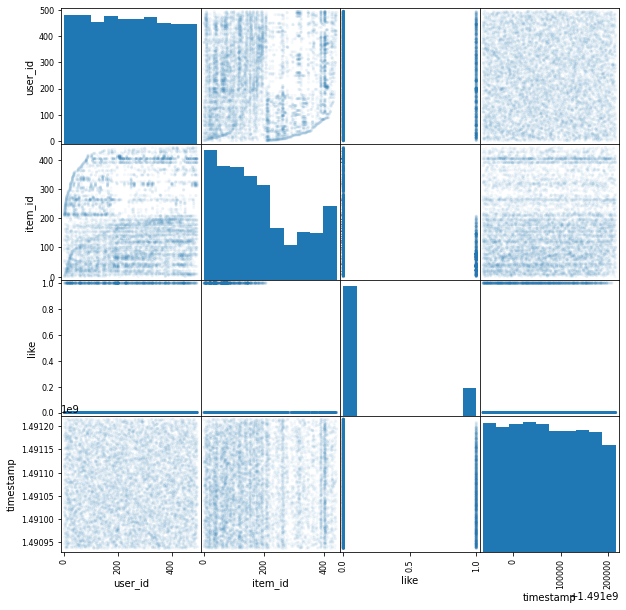

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(ds_train, alpha=0.05, figsize=(10, 10))

In [ ]:
y = ds_train.iloc[:, 2:3].values
del ds_train['like']
#del ds_train['timestamp']
ds_item = ds_item.iloc[:, :]
ds_user = ds_user.iloc[:, :]

X = ds_train.iloc[:,:]
Xt = ds_test.iloc[:,:]
X['timestamp'] = X['timestamp'] % 86400  #время суток
X['timestamp'] = X['timestamp'] / 86400
Xt['timestamp'] = Xt['timestamp'] % 86400
Xt['timestamp'] = Xt['timestamp'] / 86400
print(X)

      user_id  item_id  timestamp
0         140      342   0.210903
1         378      172   0.210972
2         150      182   0.211227
3         455       17   0.211852
4         350      409   0.212211
...       ...      ...        ...
8669      161      312   0.438877
8670      406      208   0.439155
8671      196       43   0.439537
8672       84      100   0.439572
8673       48       75   0.439757

[8674 rows x 3 columns]


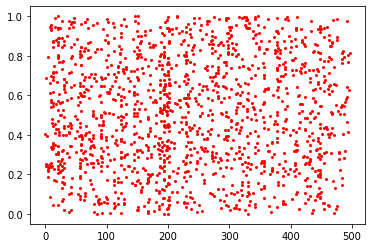

In [ ]:
fig = plt.figure()  # like from time
ax1 = fig.add_subplot(111)
for i, yv in enumerate(y):
    if (yv == 1):
        ax1.scatter(X['user_id'][i], X['timestamp'][i], s=4, c='r')
#    else:
#        ax1.scatter(X['user_id'][i], X['item_id'][i], s=4, c='b')
#ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
#plt.legend(loc='upper left');
#ax1.scatter(X['timestamp'], X['like'], s=4, c='b')
plt.show()

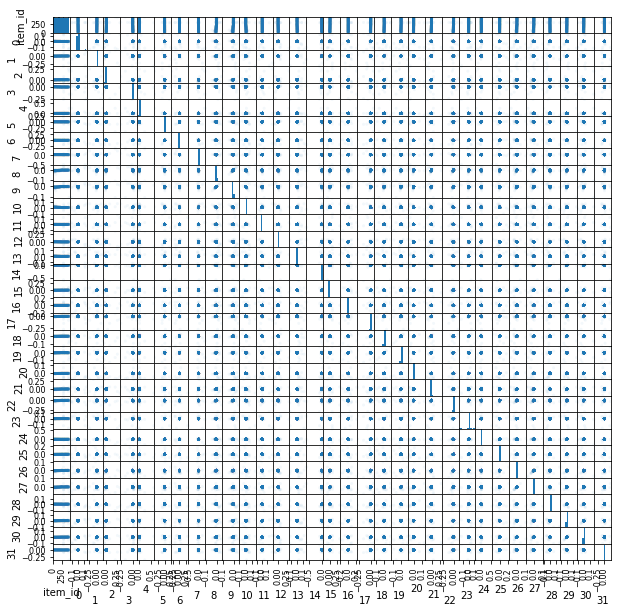

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(ds_item, alpha=0.05, figsize=(10, 10));

In [ ]:
newds = pd.DataFrame()
Z = newds.iloc[:,:]
#newds.append()
for row in ds_train.iterrows():  
    Z = pd.concat([Z, ds_user.loc[ds_user['user_id'].isin([row[1][0]])]])  #вносим данные user

newds = pd.DataFrame()
T = newds.iloc[:,:]
for row in ds_train.iterrows():  
    T = pd.concat([T, ds_item.loc[ds_item['item_id'].isin([row[1][1]])]])  #вносим данные item


In [ ]:
print(X)
print(Z)
print(T)

     user_id         0
140      140  0.001300
378      378  0.003204
150      150  0.002554
455      455  0.004649
350      350  0.000919
..       ...       ...
161      161  0.000602
406      406  0.002357
196      196  0.001667
84        84  0.001433
48        48  0.000919

[8674 rows x 2 columns]
     item_id         0         1  ...        29        30        31
296      342  0.000348 -0.000787  ... -0.000584 -0.000584  0.000149
80       172  0.002252 -0.005097  ... -0.003785 -0.003785  0.000964
115      182  0.001702 -0.003853  ... -0.002861 -0.002861  0.000728
149       17  0.002198 -0.004974  ... -0.003694 -0.003694  0.000940
86       409  0.000491 -0.001112  ... -0.000826 -0.000826  0.000210
..       ...       ...       ...  ...       ...       ...       ...
8        312  0.000348 -0.000787  ... -0.000584 -0.000584  0.000149
277      208  0.000602 -0.001362  ... -0.001012 -0.001012  0.000258
314       43  0.001390 -0.003146  ... -0.002336 -0.002336  0.000595
25       100  0.001

In [ ]:
X = np.array(X)
Z = np.array(Z)
T = np.array(T)

newds = np.concatenate((X[:, :], Z[:,1:], T[:,1:]), axis=1)
print(newds)

[[ 1.40000000e+02  3.42000000e+02  2.10902778e-01 ... -5.84063976e-04
  -5.84063976e-04  1.48672348e-04]
 [ 3.78000000e+02  1.72000000e+02  2.10972222e-01 ... -3.78516718e-03
  -3.78516718e-03  9.63506938e-04]
 [ 1.50000000e+02  1.82000000e+02  2.11226852e-01 ... -2.86131744e-03
  -2.86131744e-03  7.28342784e-04]
 ...
 [ 1.96000000e+02  4.30000000e+01  4.39537037e-01 ... -2.33625590e-03
  -2.33625590e-03  5.94689393e-04]
 [ 8.40000000e+01  1.00000000e+02  4.39571759e-01 ... -2.02325696e-03
  -2.02325696e-03  5.15016122e-04]
 [ 4.80000000e+01  7.50000000e+01  4.39756944e-01 ... -2.02325696e-03
  -2.02325696e-03  5.15016122e-04]]


In [ ]:
from sklearn.model_selection import train_test_split as train
X_train, X_test, y_train, y_test = train(newds, y, test_size=0.2, random_state = 1) #23

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new = sc.fit_transform(newds)  # scale or not
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
#print(X_test)


In [ ]:
print(X_train)

[[ 0.8605823   1.66347163 -0.69646752 ...  0.3926828   0.3926828
  -0.05756315]
 [ 1.10517687  1.33899893  0.9734566  ...  0.3926828   0.3926828
  -0.05756315]
 [ 1.22397994  1.48145036 -0.2828245  ...  0.45205096  0.45205096
  -0.06698554]
 ...
 [ 0.64394139 -0.3308484   0.15425706 ... -0.06143035 -0.06143035
   0.0145097 ]
 [ 1.1191537  -0.29127856 -1.44592611 ...  0.21616968  0.21616968
  -0.02954853]
 [-0.7257882   0.23104335 -0.70237846 ...  0.34712801  0.34712801
  -0.05033309]]


2 2
0.8997118155619597
2 3
0.906628242074928
2 4
0.9129682997118156
2 7
0.9152737752161383
2 8
0.9175792507204611
2 10
0.9198847262247839
2 20
2 30
MAX:  2 10


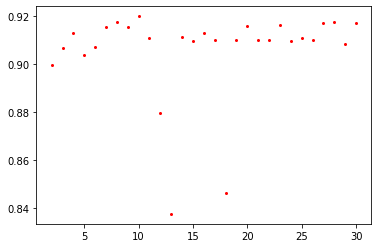

3 2
0.9002881844380404
3 3
0.9135446685878963
3 5
0.915850144092219
3 9
0.9210374639769452
3 10
3 20
3 30
MAX:  3 9


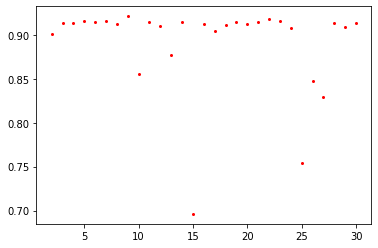

4 2
0.837463976945245
4 3
0.8610951008645533
4 4
0.9106628242074928
4 6
0.9181556195965418
4 10
4 11
0.9204610951008646
4 16
0.9221902017291066
4 20
4 30
MAX:  4 16


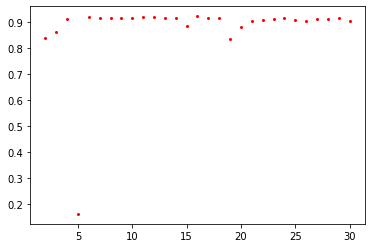

In [ ]:
from sklearn.neural_network import MLPClassifier
#scores = []  
#bs = 0  #best score
#cs = 0  #current score

j_min = 2
j_max = 5
for j in range(j_min, j_max):
    scores = []
    bs = 0  #best score
    cs = 0  #current score
    imax = 2
    for i in range(2, 31):
        clf = MLPClassifier(solver='lbfgs', alpha=3e-6, hidden_layer_sizes=(i, j), random_state=1, max_iter = 50000, max_fun=45000, verbose=True)
        clf.fit(X_train, y_train.ravel())
        cs = clf.score(X_test, y_test)
        scores.append(cs)
        if (bs < cs):
            print(j, i)
            bs = cs
            print(bs)
            imax = i
        elif (i % 10 == 0):
            print(j, i)
    print("MAX: ", j, imax)
    fig = plt.figure()
    xx = range(2, len(scores)+2)
    ax1 = fig.add_subplot(111)
    ax1.scatter(xx, scores, s=4, c='r')
    plt.show()

#ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
#plt.legend(loc='upper left');
#plt.show()

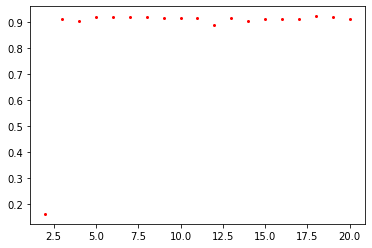

In [ ]:
fig = plt.figure()
xx = range(2, len(scores) + 2)
ax1 = fig.add_subplot(111)
ax1.scatter(xx, scores, s=4, c='r')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=3e-6, hidden_layer_sizes=(16, 4), random_state=1, max_iter = 50000, max_fun=45000, verbose=True)
clf.fit(X_train, y_train.ravel())
#clf.fit(X_new, y.ravel())

#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators = 49, criterion = 'gini', random_state = 0, max_depth=50)
#clf.fit_predict(X_train, y_train.ravel())

#from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier(n_neighbors=11, n_jobs=-1) #33
#clf.fit(X_train, y_train.ravel())
print(clf.score(X_test, y_test))



0.9221902017291066


In [ ]:
clf.fit(X_new, y.ravel()) #scale
#clf.fit(newds, y.ravel()) #noscale

MLPClassifier(activation='relu', alpha=3e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=45000, max_iter=50000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
def sortSecond(val): 
    return val[1]  
res = []
res = np.array(res)
for j in ds_test['user_id'].values:
    output = []
    op = []
    buf = 0.0
    for i in ds_item['item_id'].values:
        if((i in liked[j]) == False):
        #if(True):
            X_pred = []
            #X_pred = np.array(X_pred) #([ds_test['user_id'].iloc[j], ds_item['item_id'].iloc[i]]) 
            X_pred = np.array([Xt['user_id'].iloc[j], ds_item['item_id'].iloc[i]]) 
            X_pred = np.concatenate((X_pred, np.array([Xt['timestamp'][j]]), \
                                np.array(ds_user.iloc[ds_test['user_id'].iloc[j]:(ds_test['user_id'].iloc[j]+1), 1:].values)[0], \
                                np.array(ds_item.iloc[ds_item['item_id'].iloc[i]:(ds_item['item_id'].iloc[i]+1), 1:].values)[0]))
            X_pred = X_pred.reshape(1, -1)
            Xp = sc.transform(X_pred) #scale or not
        
        #if(!(i in liked[j])):
            buf = clf.predict_proba(Xp)[0][1]
            output.append([i, buf])    
    output.sort(key = sortSecond, reverse=True)
    output = np.array(output)
    output = np.ravel(output, order='F')
    #print(output[0:20])
    op.insert(0, ds_test['user_id'].iloc[j])
    op.extend(output[0:20])
    res = np.append(res, op, axis=0)
    if(j%10 == 0):
        #print(j, ds_test['timestamp'].iloc[j])
        print(op)

print(res)
#print(output)

[0, 40.0, 11.0, 7.0, 58.0, 36.0, 22.0, 35.0, 37.0, 66.0, 59.0, 21.0, 5.0, 67.0, 78.0, 32.0, 33.0, 19.0, 72.0, 49.0, 77.0]
[10, 22.0, 35.0, 37.0, 60.0, 65.0, 66.0, 72.0, 76.0, 80.0, 58.0, 40.0, 11.0, 36.0, 21.0, 5.0, 59.0, 67.0, 32.0, 78.0, 33.0]
[20, 22.0, 35.0, 37.0, 76.0, 65.0, 80.0, 72.0, 66.0, 58.0, 40.0, 7.0, 11.0, 36.0, 87.0, 21.0, 67.0, 5.0, 32.0, 33.0, 19.0]
[30, 40.0, 11.0, 7.0, 22.0, 36.0, 58.0, 35.0, 21.0, 5.0, 59.0, 87.0, 66.0, 67.0, 76.0, 78.0, 32.0, 33.0, 88.0, 19.0, 1.0]
[40, 36.0, 40.0, 11.0, 7.0, 21.0, 5.0, 59.0, 58.0, 87.0, 67.0, 78.0, 32.0, 33.0, 88.0, 19.0, 1.0, 49.0, 35.0, 66.0, 37.0]
[50, 36.0, 40.0, 11.0, 7.0, 21.0, 5.0, 59.0, 58.0, 22.0, 87.0, 67.0, 35.0, 78.0, 32.0, 33.0, 88.0, 19.0, 1.0, 66.0, 49.0]
[60, 22.0, 37.0, 76.0, 60.0, 65.0, 72.0, 66.0, 58.0, 7.0, 11.0, 36.0, 59.0, 87.0, 21.0, 67.0, 5.0, 78.0, 32.0, 88.0, 33.0]
[70, 87.0, 59.0, 67.0, 5.0, 21.0, 32.0, 33.0, 19.0, 78.0, 22.0, 36.0, 1.0, 35.0, 37.0, 88.0, 49.0, 76.0, 34.0, 77.0, 39.0]
[80, 22.0, 35.0, 37

In [ ]:
res2 = (res.reshape(-1, 21)).astype(int)
print(res2)


[[  0  40  11 ...  72  49  77]
 [  1  22  35 ...  32  33  19]
 [  2  67  59 ...  17  44  40]
 ...
 [494  35  22 ... 102  98  26]
 [495  76  22 ...  33  59   1]
 [496  35  22 ...  67  33  78]]


In [ ]:
names = np.array([['user_id', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])
with open(FILENAME, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(names[:, :])
    writer.writerows(res2[:, :])